In [1]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#plt.style.use('../../style_Matplotlib_charts.mplstyle')
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pickle

In [2]:
poly = pickle.load(open('poly_features.sav', 'rb'))



In [3]:
filename = 'my_saved_model_v1.sav'
model_A = pickle.load(open(filename, 'rb'))


In [4]:
testing_data = pd.read_csv('../4.Model Testing and Validation/testing_data.csv')
x_test_raw = np.array(testing_data['Combined1']).reshape(-1, 1)
y_test = np.array(testing_data['rb_win_rate'])

Number of NaN values in x_test_raw: 0


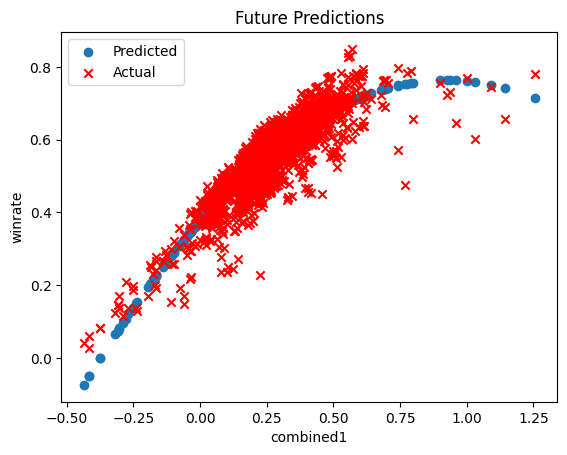

In [5]:
# Check for missing values
print(f"Number of NaN values in x_test_raw: {np.isnan(x_test_raw).sum()}")

# Handle missing values (choose one option)
# Option 1: Drop rows with missing values
mask = ~np.isnan(x_test_raw).any(axis=1)
x_test_raw = x_test_raw[mask]
y_test = y_test[mask]

# Option 2: Impute missing values
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='mean')
# x_test_raw = imputer.fit_transform(x_test_raw)

# Apply polynomial transformation
x_test = poly.transform(x_test_raw)

# Predict and evaluate
y_pred = model_A.predict(x_test)

plt.scatter(x_test_raw, y_pred, label="Predicted")
plt.scatter(x_test_raw, y_test, marker='x', c='r', label="Actual")
plt.title("Future Predictions")
plt.ylabel("winrate")
plt.xlabel("combined1")
plt.legend()
plt.show()

In [6]:
# Calculate and print the model's score
test_score = model_A.score(x_test, y_test)
print(f'Testing data score: {test_score}')

Testing data score: 0.7956841121704319


In [7]:
# Create a table of results
table = pd.DataFrame({
    'date_scaled': x_test_raw.flatten(),
    'Actual': y_test,
    'Predicted': y_pred,
    'Loss': y_test - y_pred.round(2)
})
print(table)

      date_scaled    Actual  Predicted      Loss
0        0.400890  0.641568   0.640029  0.001568
1        0.309578  0.591777   0.592953  0.001777
2        0.144254  0.544358   0.488425  0.054358
3        0.232483  0.553727   0.547302  0.003727
4        0.261464  0.583692   0.565097  0.013692
...           ...       ...        ...       ...
2269     0.306947  0.624409   0.591484  0.034409
2270     0.504415  0.662855   0.684228 -0.017145
2271     0.453990  0.691702   0.663917  0.031702
2272     0.104834  0.523947   0.459831  0.063947
2273     0.242172  0.579587   0.553336  0.029587

[2274 rows x 4 columns]


In [8]:
# Calculate and print the average loss
cost = table['Loss'].sum() / table.shape[0]
print(f"The cost or average loss of this model is {cost}")

# Print model details
print(f'X Axis intercept: {model_A.intercept_}')
print(f'Coefficient: {model_A.coef_}')

The cost or average loss of this model is -0.00020021069894848317
X Axis intercept: 0.37691049152532125
Coefficient: [ 0.83864637 -0.45476631]


In [9]:

import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import pickle

# Load the model
my_model = pickle.load(open('my_saved_model_v1.sav', 'rb'))

# Example inputs
deaths = 5
kpg = 6
kd = kpg / deaths
br = 11.7
nation = "USSR"

# Load the dataset
winrate_df = pd.read_csv("../2.Feature Engineering/wrangled_data.csv")
winrate_df['date'] = pd.to_datetime(winrate_df['date'])

# Filter data for the past month
current_date = datetime.now()
one_month_ago = current_date - timedelta(days=80)
winrate_fdf = winrate_df[
    (winrate_df['date'] >= one_month_ago) &
    (winrate_df['date'] <= current_date) &
    (winrate_df['rb_lower_br'] == br) &
    (winrate_df['nation'] == nation)
]

win_rate = winrate_fdf['rb_win_rate'].mean()
if np.isnan(win_rate):
    win_rate = 0  # Handle missing win_rate
print(f"Win rate: {win_rate}")

MIN_KPG =1
MAX_KPG = 15
MIN_KD = 1
MAX_KD = 5

if MAX_KPG == MIN_KPG:
    kpg_scaled = 0
else:
    kpg_scaled = (kpg - MIN_KPG) / (MAX_KPG - MIN_KPG)

if MAX_KD == MIN_KD:
    kd_scaled = 0
else:
    kd_scaled = (kd - MIN_KD) / (MAX_KD - MIN_KD)

input_value = (kd_scaled + kpg_scaled / 2) + (win_rate - 0.5)


input_value = np.array([[input_value]])


poly = pickle.load(open('poly_features.sav', 'rb'))
input_poly = poly.transform(input_value)
predicted_value = my_model.predict(input_poly)
predicted_value100 = predicted_value * 100


print(f"Predicted value: {predicted_value100}")



Win rate: 0.5458384965240376
Predicted value: [57.27991101]
